# K-Means Elbows and Silhouettes

A compairison of the elbow and silhouette methods of [determining the number of clusters in a data set](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
def random_blobs(max_k):
    k = np.random.randint(2, max_k + 1)
    X, y = make_blobs(
        n_samples=2048,
        n_features=2,
        centers=k,
        cluster_std=0.4,
        center_box=(2, 9))
    return X, y, k

In [3]:
def k_means_cluster(X, actual_k, limit):
    models, wcss, sils = [], [], []
    Ks = range(2, limit)
    for k in Ks:
        k_means = KMeans(n_clusters=k, max_iter=1024, init='k-means++', algorithm='lloyd').fit(X)
        sils.append(silhouette_score(X, k_means.labels_))
        wcss.append(k_means.inertia_)
        models.append(k_means)
    return models, wcss, sils

In [4]:
def plot_elbow_and_silhouette(wcss, sils, limit):
    Ks = range(2, limit)
    title_size = 24
    label_size = 12
    ax_size = (16, 5)
    fig, [ax1, ax2] = plt.subplots(2, 1)
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.suptitle('Determining the K in K-Means ', fontsize=title_size)
    fig.text(0.055, 0.665, 'Elbow', rotation=90, fontsize=title_size)
    ax1.set_ylabel('Inertia', fontsize=label_size)
    ax1.set_xticks(Ks)
    ax1.plot(Ks, wcss)
    
    ax2.set_xlabel('Number of Clusters (K)', fontsize=label_size)
    fig.text(0.055, 0.21, 'Silhoeuette', rotation=90, fontsize=title_size)
    ax2.set_ylabel('Coefficient', fontsize=label_size)
    ax2.set_xticks(Ks)
    ax2.set_ylim(0, 1)
    ax2.plot(Ks, sils)
    max_sil = max(sils)
    ax2.vlines(Ks[sils.index(max_sil)], ymin=0, ymax=max_sil, color='grey', linestyle='dotted')
    plt.show()

In [5]:
def ask_for_k_estimate(maximum_k):
    estimate = 0
    while not (1 < estimate <= maximum_k):
        estimate = int(input('What is the best K? '))
    return estimate

In [6]:
def ax_confg(ax, title, title_size, axsize):
    ax.set_title(title, fontsize=title_size, pad=16)
    ax.set_xlim(axsize)
    ax.set_ylim(axsize)
    ax.set_xticks([])
    ax.set_yticks([])

In [7]:
def plot_blobs(X, y, k, estimate, labels, size=7, alpha=0.5):
    x1, x2 = X[:, 0], X[:, 1]
    heading_size = 24
    ax_size = (0, 12)
    fig, [ax1, ax2] = plt.subplots(1, 2)
    fig.set_figwidth(16)
    fig.set_figheight(7)
    ax_confg(ax1, f'Original {k} Clusters', heading_size, ax_size)
    ax_confg(ax2, f'K-Means {estimate} Clusters', heading_size, ax_size)
    ax1.scatter(x1, x2, c=y, alpha=alpha)
    ax2.scatter(x1, x2, c=labels, alpha=alpha)

In [8]:
def main(max_k=10):
    limit = max(round(max_k * 1.5), 10)
    X, y, k = random_blobs(max_k=max_k)
    models, wcss, sils = k_means_cluster(X, y, limit)
    plot_elbow_and_silhouette(wcss, sils, limit)
    estimate = ask_for_k_estimate(len(models))
    labels = models[estimate - 2].labels_
    plot_blobs(X, y, k, estimate, labels, size=7, alpha=0.5)

# Elbows and Silhouettes
---

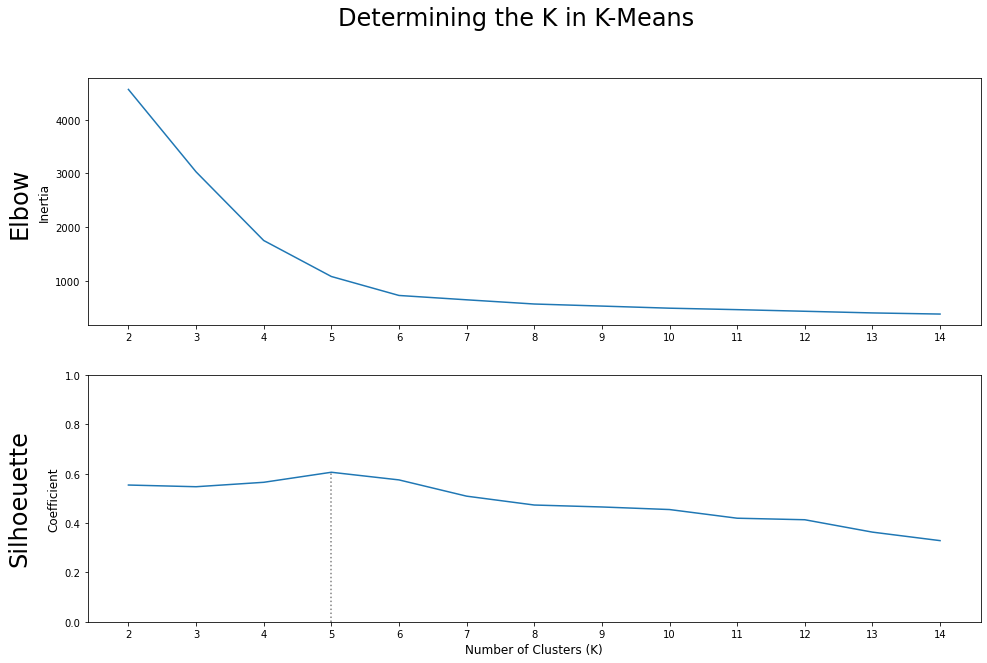

What is the best K? 6


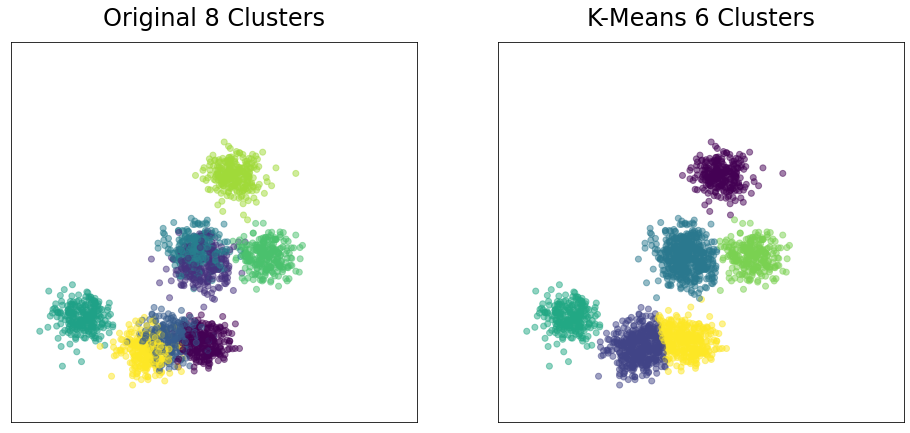

In [14]:
main()